In [114]:
# Содержание:
# Вы владеете супермаркетом и через членские карты у вас есть некоторые основные данные о ваших клиентах, такие как 
# идентификатор клиента, возраст, пол, годовой доход и оценка расходов.
# Оценка расходов — это то, что вы назначаете клиенту на основе определенных вами параметров, таких как поведение 
# клиента и данные о покупках.

In [115]:
# установка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [116]:
# импорт набора данных
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [117]:
# 2)очистка данных

In [118]:
# размера данных
data.shape

(323, 5)

In [119]:
# проверка на дубликаты (присутствует 3 дубликата)
data.duplicated().any()

True

In [120]:
# Удаление дубликатов и обновление фрейма данных
data.drop_duplicates(inplace=True)
data.duplicated().any()

False

In [121]:
# проверка, есть ли какие-либо данные NULL (нулевых значений нет)
data.isnull().any().any()

True

In [122]:
# Смотрим, какие стобцы имеют недостающие занчения (NaN) - 
data.isna().any()

CustomerID                False
Gender                    False
Age                        True
Annual Income (k$)         True
Spending Score (1-100)     True
dtype: bool

In [123]:
# Удалаяем отсутствующие значения
data = data.dropna (subset = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], how = 'any')
 # how = 'any' удалить любое отсутствующее значение в любом заданном столбце,
 # how = 'all' Если во всех указанных столбцах отсутствуют значения, удалите их.
data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [124]:
# Повторно обновить серийный номер, чтобы серийный номер был изменен на значение индекса от 0 до N по порядку
data=data.reset_index(drop=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [125]:
# Изменение названия столбцов
data.rename(columns = {"Annual Income (k$)": "Annual_Income"}, inplace = True) 
data.rename(columns = {"Spending Score (1-100)": "Spending_Score"}, inplace = True) 

data.sample()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
209,210,Male,66.0,73.0,58.0


In [126]:
# Общая информация о наборе данных и атрибутах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      317 non-null    int64  
 1   Gender          317 non-null    object 
 2   Age             317 non-null    float64
 3   Annual_Income   317 non-null    float64
 4   Spending_Score  317 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 12.5+ KB


In [127]:
# Изменение типа данных (колонки Age; Annual_Income; Spending_Score).
data.Age = data.Age.astype('int16')
data.Annual_Income = data.Annual_Income.astype('int16')
data.Spending_Score = data.Spending_Score.astype('int16')

data.head(100)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [128]:
# проверка изменения типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      317 non-null    int64 
 1   Gender          317 non-null    object
 2   Age             317 non-null    int16 
 3   Annual_Income   317 non-null    int16 
 4   Spending_Score  317 non-null    int16 
dtypes: int16(3), int64(1), object(1)
memory usage: 6.9+ KB


In [129]:
# Просмотр основного размера данных
data.shape

(317, 5)

In [130]:
# 3) поиск и устранение аномалий

In [131]:
# обработка выбросов
data.describe ()


,CustomerID,Age,Annual_Income,Spending_Score
count,317.000000,317.000000,317.000000,317.000000
mean,159.794953,38.328076,69.104101,51.684543
std,92.671833,14.527787,27.540049,26.771800
min,1.000000,-32.000000,15.000000,-10.000000
25%,80.000000,30.000000,49.000000,32.000000
50%,159.000000,36.000000,71.000000,51.000000
75%,241.000000,48.000000,85.000000,74.000000
max,320.000000,77.000000,139.000000,99.000000


In [132]:
# Удаление отрицательного значения в столбце Age
querySer = data.loc [:, 'Age']> 0 # Выбрать все строки, столбец «Age» больше 0
 # Применить условия запроса
print ('Перед удалением выбросов:', data.shape)
data=data.loc[querySer,:]
print ('После удаления выбросов:', data.shape)

Перед удалением выбросов: (317, 5)
После удаления выбросов: (315, 5)


In [133]:
# Удаление отрицательного значения в столбце Annual_Income
querySer = data.loc [:, 'Annual_Income']> 0 # Выбрать все строки, столбец «Annual_Income» больше 0
 # Применить условия запроса
print ('Перед удалением выбросов:', data.shape)
data=data.loc[querySer,:]
print ('После удаления выбросов:', data.shape)

Перед удалением выбросов: (315, 5)
После удаления выбросов: (315, 5)


In [134]:
# Удаление отрицательного значения в столбце Spending_Score
querySer = data.loc [:, 'Spending_Score']> 0 # Выбрать все строки, столбец «Spending_Score» больше 0
 # Применить условия запроса
print ('Перед удалением выбросов:', data.shape)
data=data.loc[querySer,:]
print ('После удаления выбросов:', data.shape)

Перед удалением выбросов: (315, 5)
После удаления выбросов: (314, 5)


In [135]:
# 4) Кластерный анализ

In [136]:
# Кластерный анализ по годовому доходу и оценке расходов.
x = data.iloc[:, [3, 4]].values
print(x.shape)

(314, 2)


In [137]:
# Алгоритм K-средних
# Метод локтя для определения количества оптимальных кластеров

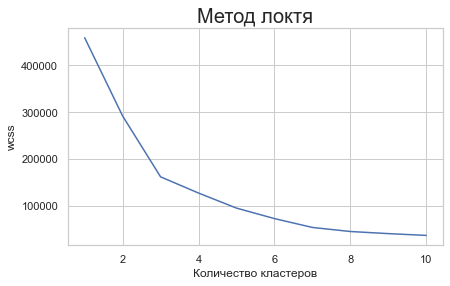

In [138]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя', fontsize = 20)
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

In [139]:
# Визуализация кластеров

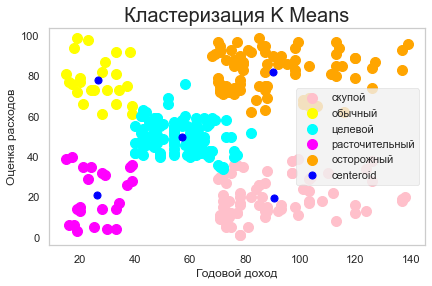

In [140]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'скупой')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'обычный')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'целевой')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'расточительный')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'осторожный')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Кластеризация K Means', fontsize = 20)
plt.xlabel('Годовой доход')
plt.ylabel('Оценка расходов')
plt.legend()
plt.grid()
plt.show()

In [141]:
# Этот кластерный анализ дает нам очень четкое представление о различных сегментах покупателей в торговом центре. 
# Очевидно, существует пять сегментов клиентов, а именно скупой, обычный, целевой, расточительный, осторожный, 
# основанный на их годовом доходе и оценке расходов, которые, как сообщается, являются лучшими факторами / атрибутами 
# для определения сегментов клиента в торговом центре.

In [142]:
# Иерархическая кластеризация

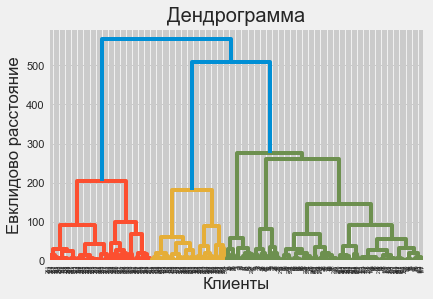

In [143]:
# Используем дендрограмму, чтобы найти оптимальные кластеры
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Дендрограмма', fontsize = 20)
plt.xlabel('Клиенты')
plt.ylabel('Евклидово расстояние')
plt.show()

In [144]:
# Визуализация кластеров иерархической кластеризации

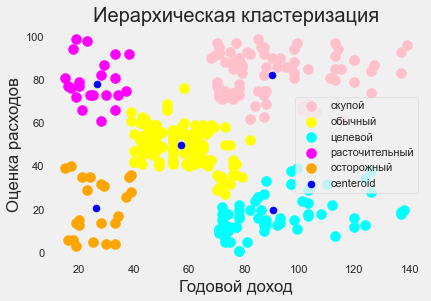

In [145]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'скупой')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'обычный')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'целевой')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'расточительный')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'осторожный')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Иерархическая кластеризация', fontsize = 20)
plt.xlabel('Годовой доход')
plt.ylabel('Оценка расходов')
plt.legend()
plt.grid()
plt.show()

In [146]:
# Кластеризация групп клиентов по возрасту

In [147]:
x = data.iloc[:, [2, 4]].values
x.shape

(314, 2)

In [148]:
# Алгоритм K-средних
# Метод локтя для определения количества оптимальных кластеров

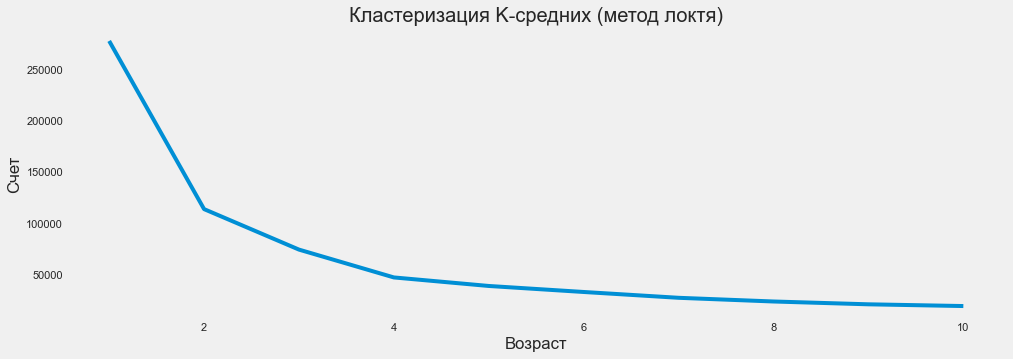

In [149]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('Кластеризация K-средних (метод локтя)', fontsize = 20)
plt.xlabel('Возраст')
plt.ylabel('Счет')
plt.grid()
plt.show()

In [150]:
# Визуализация кластеров

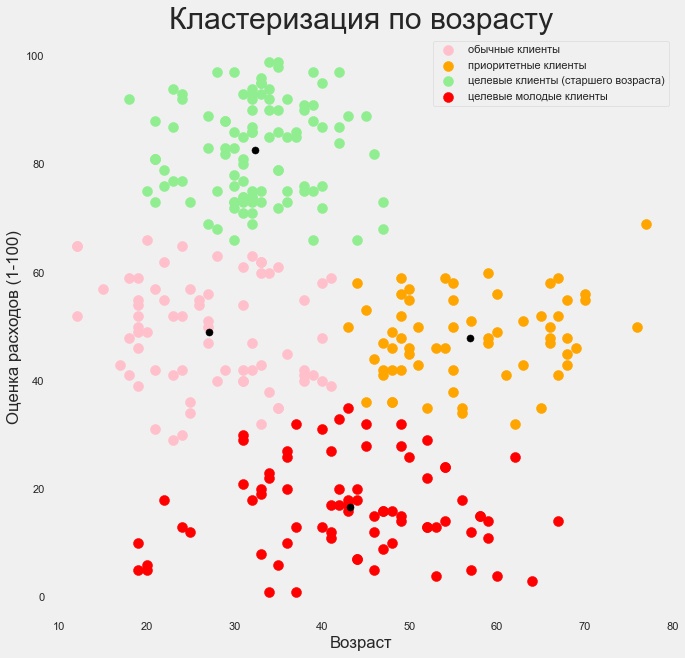

In [151]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Кластеризация по возрасту', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'обычные клиенты' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'приоритетные клиенты')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'целевые клиенты (старшего возраста)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'целевые молодые клиенты')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Возраст')
plt.ylabel('Оценка расходов (1-100)')
plt.legend()
plt.grid()
plt.show()

In [152]:
# Глядя на приведенный выше график кластеризации между возрастом клиентов и их соответствующими оценками расходов,
# их можно объединить в 4 разные категории, а именно: обычные клиенты, приоритетные клиенты, целевые клиенты старшего 
# возраста, целевые молодые клиенты. 
# Затем, получив результаты, мы можем соответствующим образом разработать различные маркетинговые стратегии и 
# политики для оптимизации показателей расходов клиентов в торговом центре.

In [153]:
# 6) Визуализация данных

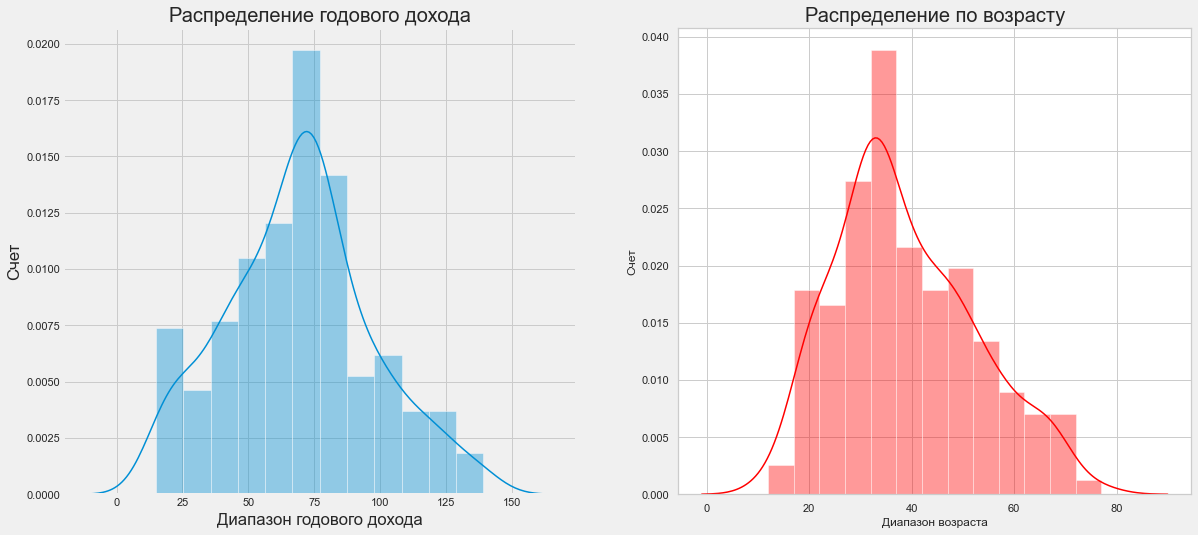

In [154]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual_Income'])
plt.title('Распределение годового дохода', fontsize = 20)
plt.xlabel('Диапазон годового дохода')
plt.ylabel('Счет')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Распределение по возрасту', fontsize = 20)
plt.xlabel('Диапазон возраста')
plt.ylabel('Счет')
plt.show()

In [155]:
# Здесь, на приведенных выше графиках, мы можем увидеть схему распределения годового дохода и возраста. 
# Глядя на графики, мы можем сделать вывод, что мало кто зарабатывает более 100 долларов США. 
# У большинства людей заработок составляет около 50-75 долларов США. Кроме того, мы можем сказать, что наименьший доход 
# составляет около 20 долларов США.

# Выводы о Клиентах.
# Возраст самых постоянных клиентов ТРЦ около 30-35 лет. Принимая во внимание, что возрастная группа пожилых людей 
# является наименее частым посетителем в торговом центре. 
# Молодежь меньше в umber по сравнению с людьми среднего возраста.

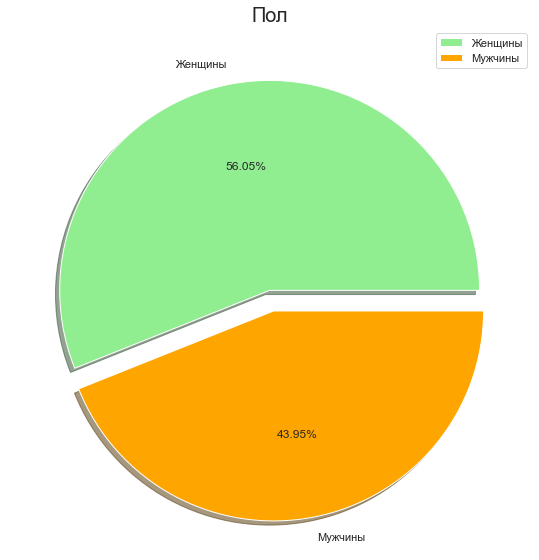

In [156]:
labels = ['Женщины', 'Мужчины']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Пол', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [157]:
# Глядя на приведенную выше круговую диаграмму, которая объясняет распределение пола в торговом центре.
# Интересно, что женщины лидируют с долей 56%, тогда как доля мужчин составляет 44%, что является огромным разрывом,
# особенно когда численность мужчин сравнительно выше, чем женщин.

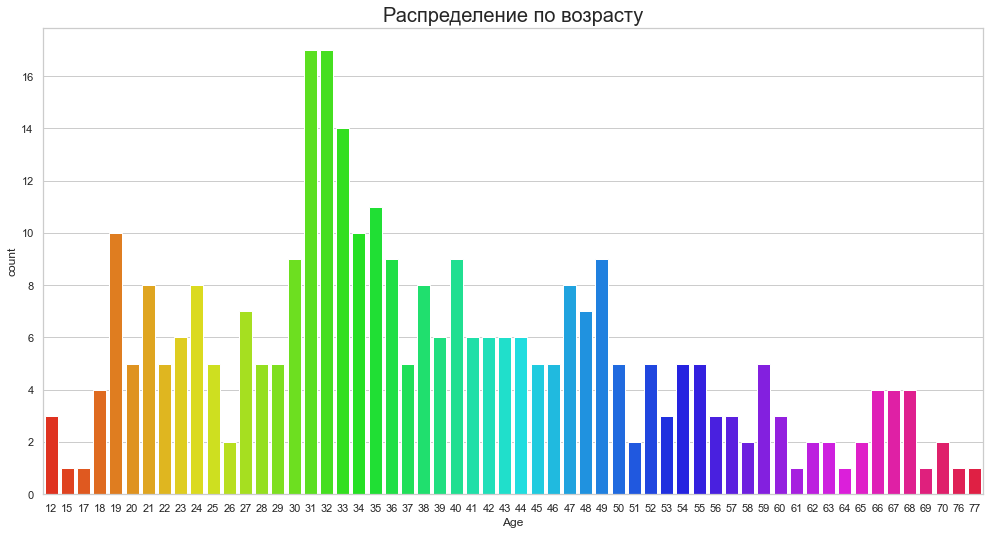

In [158]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Распределение по возрасту', fontsize = 20)
plt.show()

In [159]:
# На этом графике показана более интерактивная диаграмма о распределении каждой возрастной группы в торговом центре, 
# чтобы получить более четкое представление о возрастной группе посетителей в торговом центре.
# Глядя на приведенный выше график, можно увидеть, что возраст от 27 до 39 лет очень частый, но нет четкой закономерности.
# Люди в возрасте 55, 56, 69, 64 лет очень редко посещают торговые центры.
# Люди в возрасте 32 лет — самые частые посетители торгового центра.

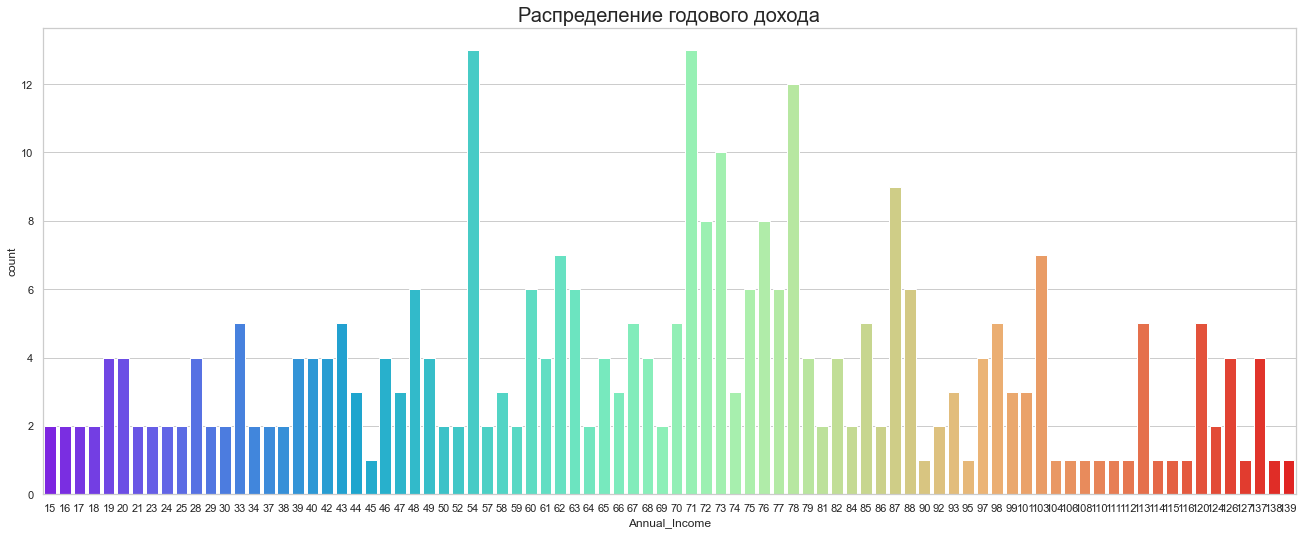

In [160]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual_Income'], palette = 'rainbow')
plt.title('Распределение годового дохода', fontsize = 20)
plt.show()

In [161]:
# В торговом центре есть клиенты с очень сопоставимой частотой с их годовым доходом в диапазоне от 15 долларов США
# до 137 тысяч долларов США. В торговом центре больше клиентов, годовой доход которых составляет 54 тысячи долларов США
# или 78 долларов США.

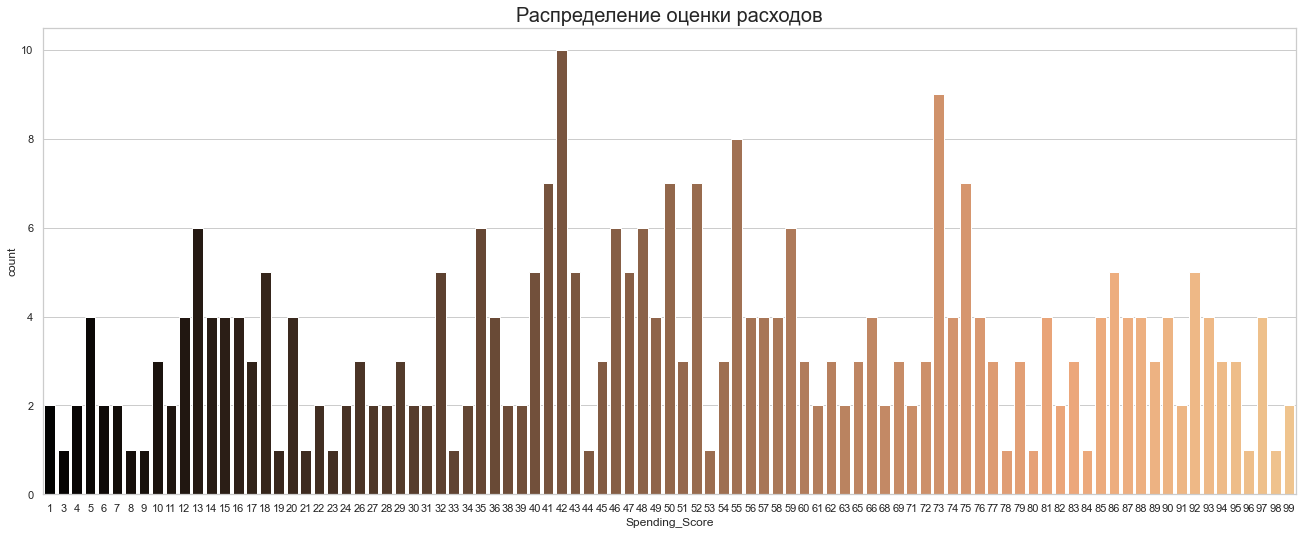

In [162]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending_Score'], palette = 'copper')
plt.title('Распределение оценки расходов', fontsize = 20)
plt.show()

In [163]:
# можем сказать, что большинство клиентов имеют показатель расходов в диапазоне 35-60.
# Интересно, что есть клиенты, у которых также есть I балл по расходам и 99 баллов по расходам, что показывает, 
# что торговый центр обслуживает множество клиентов с различными потребностями и требованиями, доступными в торговом центре.

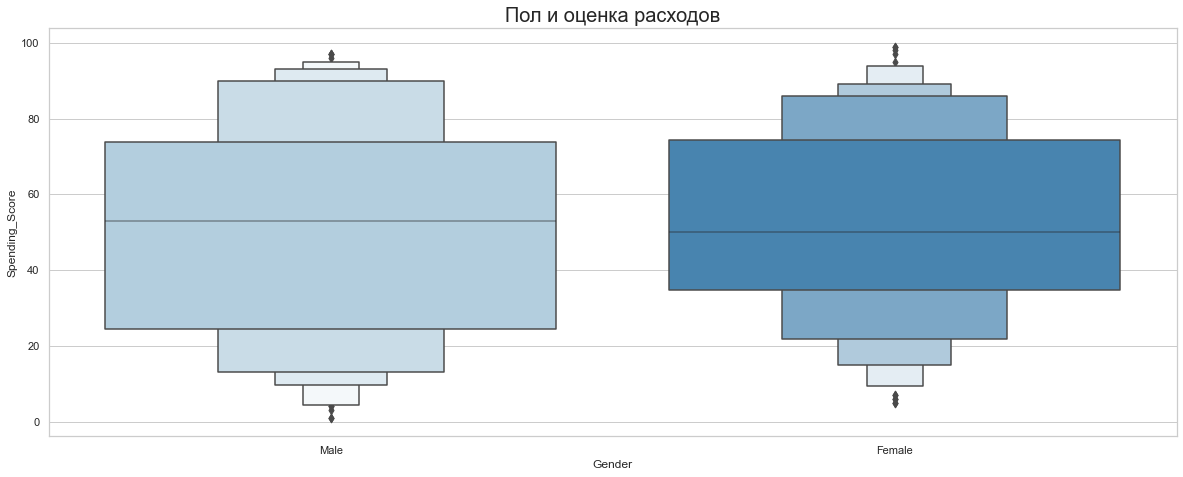

In [164]:
# Пол по сравнению с показателем расходов
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending_Score'], palette = 'Blues')
plt.title('Пол и оценка расходов', fontsize = 20)
plt.show()

In [165]:
# Отчетливо видно, что у большинства мужчин показатель расходов составляет от 25 до 70 тысяч долларов США, 
# тогда как у женщин показатель расходов составляет от 35 до 75 тысяч долларов США. что еще раз указывает на тот факт, 
# что женщины являются лидерами покупок.

In [166]:
# 7)Выполнение запросов по сформированным данным

In [167]:
# Запрос: Сколько клиентов женщин присутствует в нашем наборе данных?

client_gender_df=data.query('Gender =="Female"')
client_gender_df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
308,312,Female,12,106,65
310,314,Female,34,114,94
311,315,Female,53,124,13
312,316,Female,43,120,89


In [168]:
# Вывод: Всего в нашем наборе данных 176 клиентов женщин.

In [169]:
# Запрос: Сколько клиентов мужчин присутствует в нашем наборе данных?

client_gender_df=data.query('Gender =="Male"')
client_gender_df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
304,308,Male,33,116,62
309,313,Male,34,115,85
314,318,Male,42,127,87
315,319,Male,33,138,20


In [170]:
# Вывод: Всего в нашем наборе данных 138 клиентов мужчин.

In [171]:
# Запрос: Какое кол-во клиентов осуществляли покупки в возрасте 30 лет ?.
Age_df=data.query('Age == 30')
Age_df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
9,10,Female,30,19,72
37,38,Female,30,34,73
157,158,Female,30,78,78
159,160,Female,30,78,73
175,176,Female,30,88,86
185,186,Male,30,99,97
199,200,Male,30,137,83
225,226,Female,30,71,76
284,288,Male,30,101,66


In [172]:
# Вывод: в возрасте 30 лет было было осуществлено 9 покупок.

In [182]:
# Вопрос: кто именномужчины или женщины имеют самые высокие расходы?

high_costs_df=data.sort_values("Spending_Score",ascending=False)
high_costs_df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
11,12,Female,35,19,99
264,268,Female,34,85,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
...,...,...,...,...,...
30,31,Male,60,30,4
32,33,Male,53,33,4
8,9,Male,64,19,3
156,157,Male,37,78,1


In [175]:
# Вывод: Самые высокие расходы имеют женщины (99); Среди мужчин самый высокий расход составляет (97).